# Práctica 5 - Análisis en frecuencia

## Nombres: Maria Camila Bravo , David Alejandro Henao 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import scipy.signal as sp
from scipy import signal 
from scipy.io import loadmat
from scipy.signal import welch
from numpy import hanning
import os
from scipy.signal import welch, sosfiltfilt
from scipy.signal import butter, sosfilt


## 4. Aplicación

#### 4.1 Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. 


La frecuencia de muestreo según el teorema de Nyquist sera la igual o mayor al doble de la frecuencia máxima, en éste caso deberá ser >= a 2*160Hz 

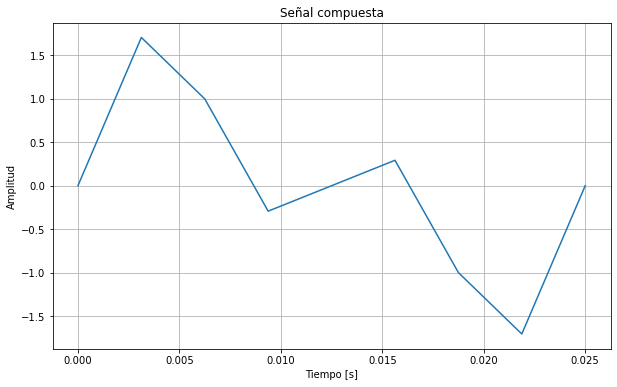

In [2]:
frequencies = [40, 80, 160]  
fs = 320
Tp = 1/40 
Ts = 1/fs
t = np.arange(0,Tp+ Ts,1/fs) 
# Crear la señal sumando las tres componentes sinusoidales
signal =  np.sin(2 * np.pi * frequencies[0] * t) + \
          np.sin(2 * np.pi * frequencies[1] * t) + \
          np.sin(2 * np.pi * frequencies[2] * t)

plt.figure(figsize=(10, 6))

plt.plot(t, signal)
plt.title('Señal compuesta')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


Se siguió el teorema de Nyquits para la fecuencia, pero la señal estaba poco suavizada, asi que aumentamos la frecuencia a 10 veces la frecuencia de muestreo y obtuvimso el siguiente resultado:

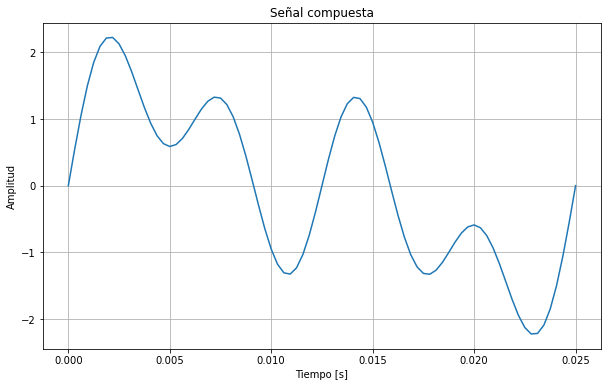

In [3]:
frequencies = [40, 80, 160]  
fs = 3200  
Tp = 1/40 
Ts = 1/fs
t = np.arange(0,Tp+Ts,1/fs) 
# Crear la señal sumando las tres componentes sinusoidales
signal =  np.sin(2 * np.pi * frequencies[0] * t) + \
          np.sin(2 * np.pi * frequencies[1] * t) + \
          np.sin(2 * np.pi * frequencies[2] * t)

plt.figure(figsize=(10, 6))
plt.plot(t, signal)
plt.title('Señal compuesta')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


 Al generar la señal compuesta por las tres ondas senoidales con su frecuencia, cada onda completa un ciclo 40, 80 y 160 veces por segundo y estas se superponen en el grafico. respectivamente. Se determino que la frecuencia de muestreo quien indica cuántas veces por segundo se tomas una captura de la señal es minima debido a que la senal recontruida se parece a la original y por lo tanto no se pierde información. Dado el caso de que la frecuencia de muestreo no hubiera sido correcta o fuera demasiado baja, las oscilaciones más rápidas de la señal no podrian ser capturadas correctamente, dando lugar a una señal reconstruida distorsionada, fenomeno conocido como aliasing [1].

## 4.2	Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal). (10%)

## Graficamos 10 periodos de la señal

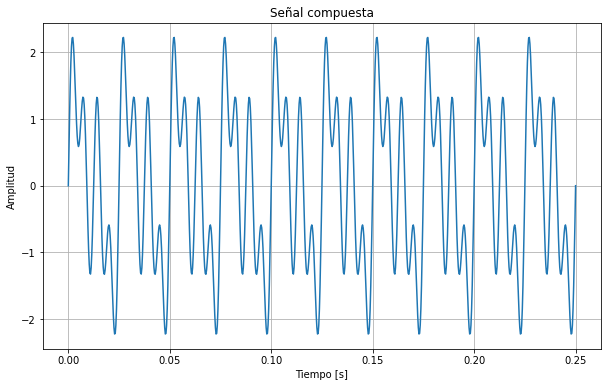

In [4]:
frequencies = [40, 80, 160]  
fs = 3200
Tp = 1/40 # es el MCM de las 3 frecuencias.
t = np.arange(0,10*Tp+ Ts,1/fs) 
# Crear la señal sumando las tres componentes sinusoidales
signal =  np.sin(2 * np.pi * frequencies[0] * t) + \
          np.sin(2 * np.pi * frequencies[1] * t) + \
          np.sin(2 * np.pi * frequencies[2] * t)

plt.figure(figsize=(10, 6))
plt.plot(t, signal)
plt.title('Señal compuesta')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

## Aplicamos la transformada rápida de Fourier

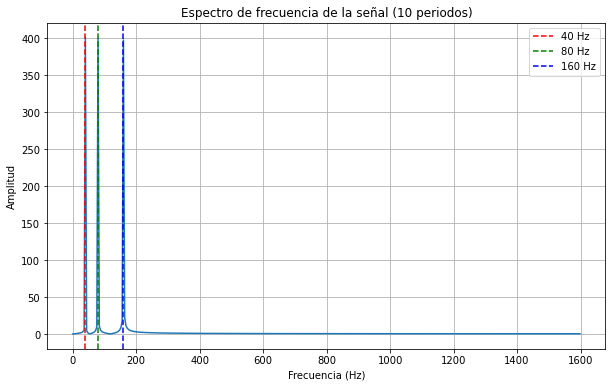

In [5]:

signal_fft = np.fft.fft(signal) # Calcular la transformada de Fourier de la señal
N = len(signal)  # Número de puntos de la señal --> 800

Nmitad = int(np.ceil(N / 2)) 
Fmitad = np.arange(0, Nmitad) * fs / N  
signal_fft_mitad = signal_fft[0:Nmitad]  

plt.figure(figsize=(10, 6))
plt.plot(Fmitad, np.abs(signal_fft_mitad))  # Gráfico de magnitud
plt.title('Espectro de frecuencia de la señal (10 periodos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

# Identificar las frecuencias de las componentes
plt.axvline(x=40, color='r', linestyle='--', label='40 Hz')
plt.axvline(x=80, color='g', linestyle='--', label='80 Hz')
plt.axvline(x=160, color='b', linestyle='--', label='160 Hz')
plt.legend()
plt.show()



## Para una mejor visualizacion acotamos el eje x

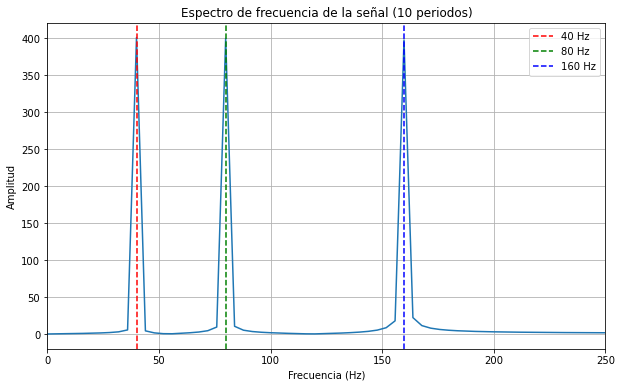

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(Fmitad, np.abs(signal_fft_mitad))  # Gráfico de magnitud
plt.title('Espectro de frecuencia de la señal (10 periodos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

# Identificar las frecuencias de las componentes
plt.axvline(x=40, color='r', linestyle='--', label='40 Hz')
plt.axvline(x=80, color='g', linestyle='--', label='80 Hz')
plt.axvline(x=160, color='b', linestyle='--', label='160 Hz')
plt.legend()
plt.xlim(0,250)
plt.show()

Se uso la Funcion np.fft.fft la cual calcula la Transformada de Fourier discreta de una secuencia unidimensional [2]  y obtener su representacion en el dominio de la frecuencia de los 10 periodos de la misma.  Al generar la grafica se observaron 3 picos y para mejor visualizacion se acoto el eje x , siendo  asi mas facil reconocer las frecuencias senoidales (40 Hz, 80 Hz y 160 Hz) donde sus picos son significativos que reflejan una misma amplitud , un espectro limpio sin ruido y  confirman las frecuencias que componene la señal original.

## 4.3	Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior. 

La funcion np.fft.ifft permite calcular la Transformada Inversa de Fourier discreta de una secuencia unidimensional [2]. Esta función toma los coeficientes en el dominio de la frecuencia (resultado de np.fft.fft) y los convierte nuevamente al dominio del tiempo.

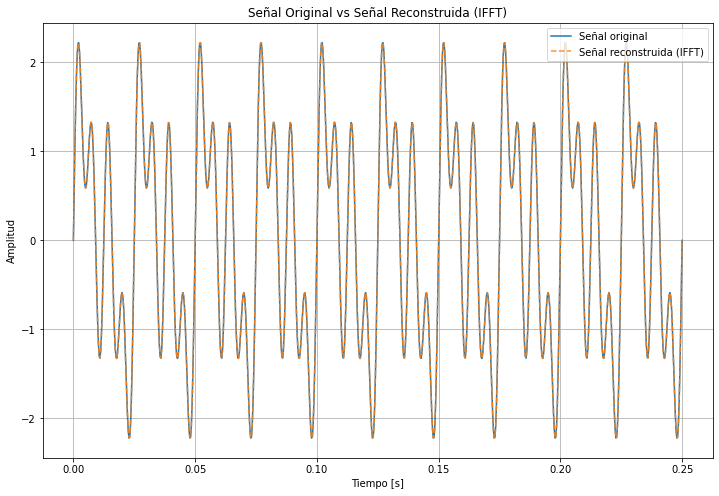

In [7]:
# Calcular la transformada inversa de Fourier
signal_reconstructed = np.fft.ifft(signal_fft)

# Graficar la señal original y la señal reconstruida
plt.figure(figsize=(12, 8))
plt.plot(t, signal, label='Señal original')
plt.plot(t, signal_reconstructed.real, '--', label='Señal reconstruida (IFFT)', alpha = 0.85)
plt.title('Señal Original vs Señal Reconstruida (IFFT)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


Al aplicar la Transformada Inversa de Fourier (con np.fft.ifft), el resultado que se obtuvo fue  la señal original en el dominio del tiempo, reconstruida a partir de sus componentes frecuenciales se verifica  que la señal reconstruida es  similar a la señal original, Por lo tanto no hubo pérdidas de información durante el proceso, la señal resultante es practicamente idéntica a la señal original.




## 4.4	¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?  Extraiga de manera similar cada una de las componentes de la señal.


<ipython-input-9-a8d5fafe742c>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[9:13] = F1[9:13] #valores de ciertas frecuencias específicas


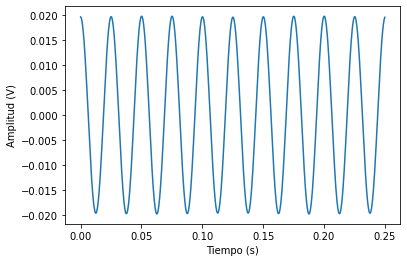

In [9]:
x=signal
F1=np.fft.fft(x)   #Calcula la Transformada de Fourier de la señal x , y convierte la señal del dominio del tiempo al dominio de la frecuencia.
F2 = np.zeros((len(F1))) #Se crea una nueva señal en el dominio de la frecuencia (inicializada con ceros) con la misma longitud que F1.
F2[9:13] = F1[9:13] #valores de ciertas frecuencias específicas
xr = np.fft.ifft(F2) #Aplica la Transformada Inversa de Fourier solo a ciertos valores.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)')
plt.show()

Sí, estas líneas de código actúan como un filtro porque seleccionan solo ciertas frecuencias de la señal original, lo que es similar a un filtro pasa bandas. Al copiar un rango específico de frecuencias con F2[9:13] = F1[9:13];, estamos aislando esas componentes, mientras que las demás frecuencias se eliminan. Luego al aplicar la transformada inversa en la linea 4, se obtiene una señal en el dominio del tiempo que solo tiene las componentes que fueron filtradas para finalmente graficarla

### Ahora graficamos las 3 componentes de frecuencia por separado

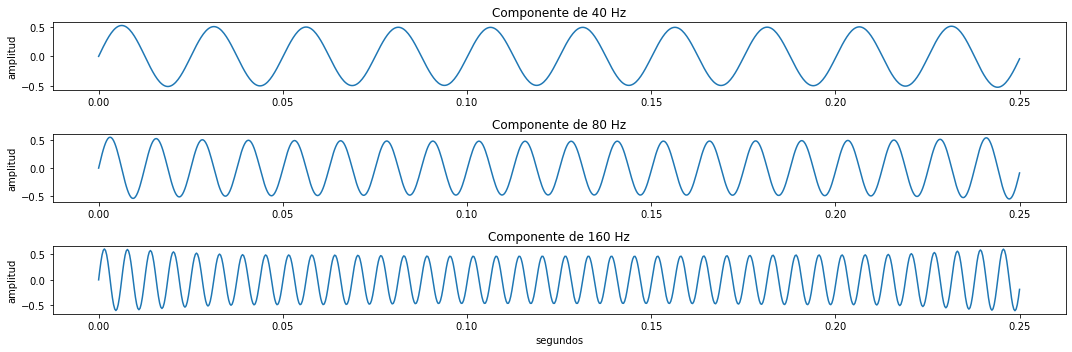

In [10]:
frec40=np.zeros(len(signal_fft))
frec80=np.zeros(len(signal_fft))
frec160=np.zeros(len(signal_fft))
frec40[0:15]=np.abs(signal_fft)[0:15] #40Hz
frec80[15:30]=np.abs(signal_fft)[15:30] #80Hz
frec160[35:45]=np.abs(signal_fft)[35:45] #160Hz
comps= [frec40,frec80,frec160]
plt.figure(figsize=(15,5))
for i in range(0,3):
    plt.subplot(3,1,i+1)
    plt.plot(t,np.imag(np.fft.ifft(comps[i])))
    plt.title(f'Componente de {frequencies[i]} Hz')
    plt.ylabel('amplitud')
plt.xlabel('segundos')
plt.tight_layout()

Se visualiza cómo se combinan cada una de las líneas en el gráfico, las cuales representan la contribución de una banda de frecuencia específica a la señal original. Además, se observa que la amplitud de las señales varía entre las diferentes bandas: las bandas bajas muestran patrones más suaves, mientras que las bandas más altas pueden ser más complejas y contener variaciones más rápidas.

**4.5** El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodograms de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana hanning, y justificar la elección del solapamiento y el ancho de la ventana)

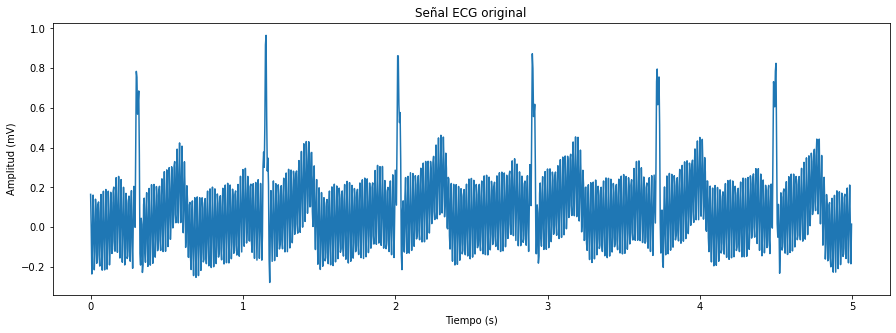

Forma de la señal ECG: (1250, 1)


In [11]:
data = loadmat('senecg.mat')
ecg_signal = data['ECG']
fs = 250  # Frecuencia de muestreo (Hz)

plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, len(ecg_signal) / fs, 1 / fs), ecg_signal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal ECG original')
plt.show()
print("Forma de la señal ECG:", ecg_signal.shape)

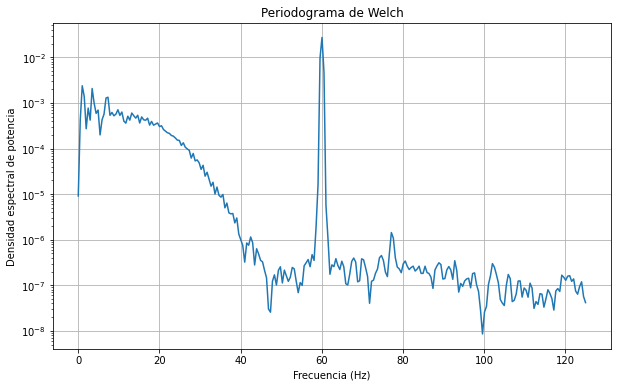

In [12]:
ecg_length = len(ecg_signal)
nperseg_value = min(ecg_length, 512)  # Definir un máximo de 512 
noverlap_value = min(nperseg_value // 2, ecg_length - 1)
f_welch, Pxx_welch = welch(ecg_signal.flatten(), fs=fs, window='hann', nperseg=nperseg_value, noverlap=noverlap_value)

plt.figure(figsize=(10, 6))
plt.semilogy(f_welch, Pxx_welch)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.show()


Para las señales de ECG la frecuencia estara en el rango de 0.05 a 100 Hz [2], encontrandose la mayor parte de la energía enntre 0.05 y 50Hz 

En cuanto a determinar si es necesario eliminar ruido, el análisis del espectro de potencia muestra lo siguiente:

- Hay un pico en 60 Hz, esto indica ruido de línea eléctrica. Este tipo de ruido es muy común en equipos electrónicos y debe ser eliminado

- Posible ruido por componentes de alta frecuencia.

In [20]:
# Análisis de frecuencia usando el Periodograma de Welch
ecg_length = len(ecg_signal)
nperseg_value = min(ecg_length, 512)  # Tamaño del segmento
noverlap_value = min(nperseg_value // 2, ecg_length - 1)

f_welch, Pxx_welch = welch(ecg_signal.flatten(), fs=fs, window='hann', nperseg=nperseg_value, noverlap=noverlap_value)

# Aplicar el filtro 
F_ecg = np.fft.fft(ecg_signal.flatten())
frequencies = np.fft.fftfreq(len(F_ecg), d=1/fs)

# Filtrar: Mantener frecuencias entre 0.05 y 100 Hz
F_ecg_filtered = np.copy(F_ecg)
F_ecg_filtered[np.abs(frequencies) > 100] = 0  # Eliminar frecuencias > 100 Hz
F_ecg_filtered[np.abs(frequencies) < 0.05] = 0  # Eliminar frecuencias < 0.05 Hz
F_ecg_filtered[np.abs(frequencies) == 60] = 0  # Eliminar los 60 Hz ruido eléctrico

# Transformada inversa 
ecg_signal_filtered = np.fft.ifft(F_ecg_filtered)


Text(0, 0.5, 'Amplitud')

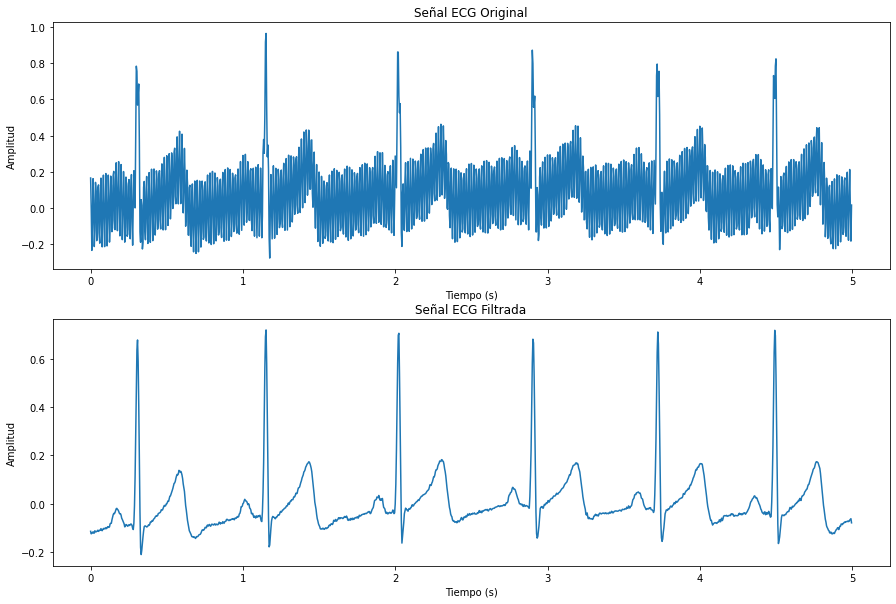

In [17]:
# señal filtrada vs la original # Graficar resultados
plt.figure(figsize=(15, 10))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(t, ecg_signal)
plt.title('Señal ECG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t, np.real(ecg_signal_filtered))
plt.title('Señal ECG Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

(0.0, 125.0)

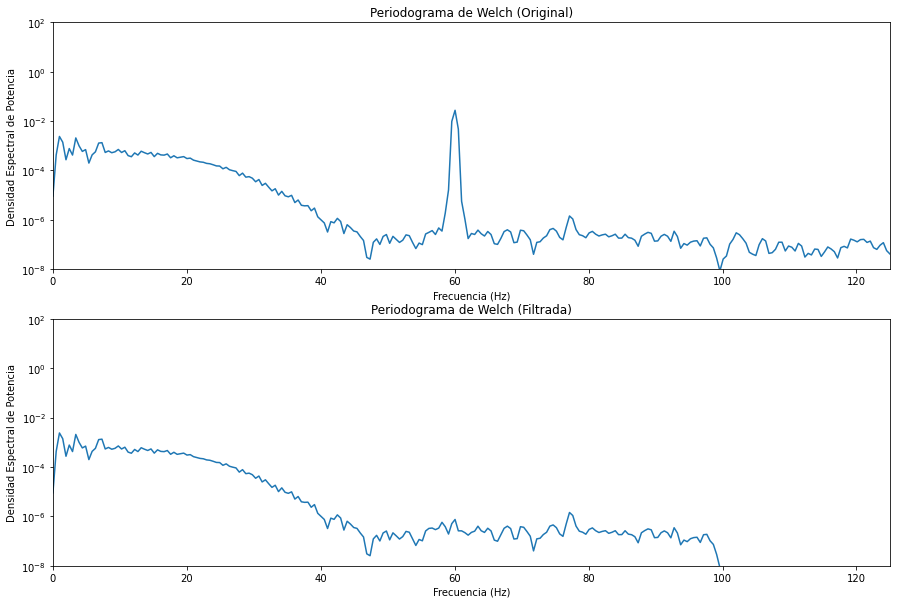

In [19]:
# Periodograma de la filtrada vs la original

# Periodograma de Welch - Original
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.semilogy(f_welch, Pxx_welch)
plt.title('Periodograma de Welch (Original)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')
plt.ylim([1e-8, 1e2])
plt.xlim([0, fs / 2])

# Periodograma de Welch - Filtrada
plt.subplot(2, 1, 2)
plt.semilogy(f_welch_filtered, Pxx_welch_filtered)
plt.title('Periodograma de Welch (Filtrada)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')
plt.ylim([1e-8, 1e2])
plt.xlim([0, fs / 2])

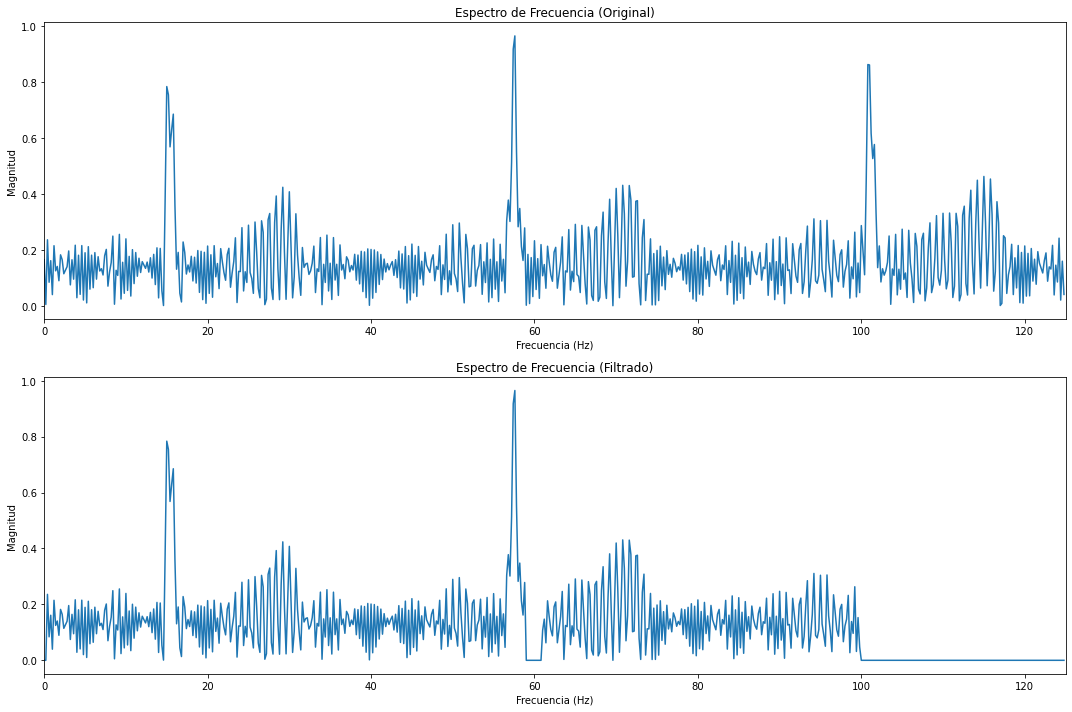

In [21]:
# Espéctro de la filtrada vs la original

# Espectro de frecuencia - Original
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
freq = np.fft.fftfreq(len(ecg_signal), 1 / fs)
plt.plot(freq[:len(freq) // 2], np.abs(F1[:len(F1) // 2]))
plt.title('Espectro de Frecuencia (Original)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim([0, fs / 2])

# Espectro de frecuencia - Filtrado
plt.subplot(2, 1, 2)
plt.plot(freq[:len(freq) // 2], np.abs(F2[:len(F2) // 2]))
plt.title('Espectro de Frecuencia (Filtrado)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim([0, fs / 2])

plt.tight_layout()
plt.show()

Elegir el solapamiento y el ancho de la ventana en el periodograma de Welch es crucial para obtener un buen análisis de la señal ECG. En este caso, un solapamiento del 50% es bastante común, ya que ayuda a suavizar el espectro promediado y a reducir la variabilidad entre las ventanas consecutivas sin perder demasiada información. Por otro lado, utilizamos una ventana Hanning porque su forma redondeada minimiza los efectos de discontinuidad en los extremos de los segmentos. Esto mejora la resolución en frecuencia sin comprometer la precisión temporal. Para las señales de ECG, que a menudo tienen componentes de baja frecuencia que queremos analizar, estos parámetros permiten identificar claramente las bandas relevantes, como el ruido de 60 Hz

**4.6** Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventana)

Se visualizaron las señales originales de Paciente Sano y Parkinson.

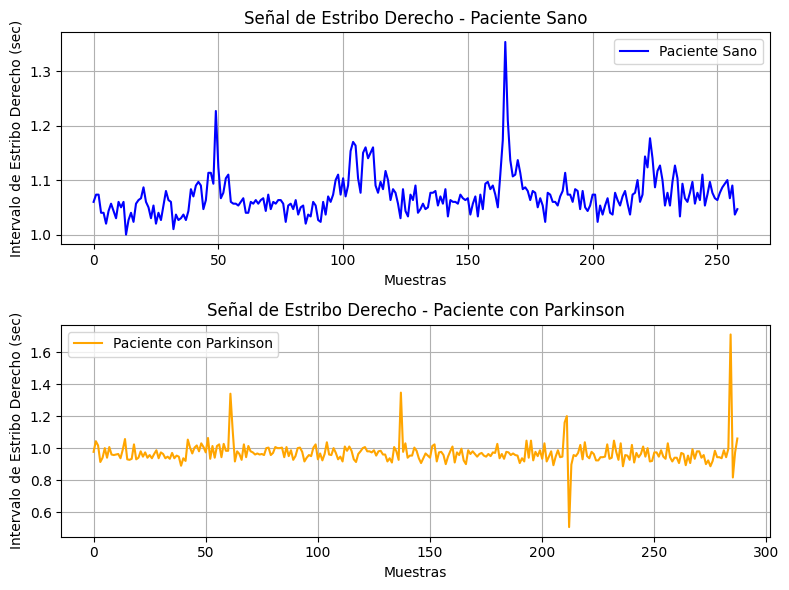

In [159]:
ruta_archivos_sano = '/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto1/Control'
ruta_archivos_park = '/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto1/Parkinson'

names = [
    'Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)',
    'Left Swing Interval (sec)', 'Right Swing Interval (sec)', 'Left Swing Interval (% of stride)',
    'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)',
    'Left Stance Interval (% of stride)', 'Right Stance Interval (% of stride)',
    'Double Support Interval (sec)', 'Double Support Interval (% of stride)'
]

def cargar_señales(ruta_completa):
    # Leer el archivo
    archivo = pd.read_csv(ruta_completa, delimiter='\t', names=names)
    
    return archivo

# Cargar una señal de control (paciente sano)
ruta_completa_sano = os.path.join(ruta_archivos_sano, 'control1.ts')  
señales_sano = cargar_señales(ruta_completa_sano)

# Cargar una señal de Parkinson
ruta_completa_park = os.path.join(ruta_archivos_park, 'park10.ts') 
señales_park = cargar_señales(ruta_completa_park)

# Seleccion de senal de interes.
señal_sano = señales_sano['Right Stride Interval (sec)'].dropna().values
señal_park = señales_park['Right Stride Interval (sec)'].dropna().values


# Graficar las señales originales
plt.figure(figsize=(8, 6))

# Señal del paciente sano
plt.subplot(2, 1, 1)
plt.plot(señal_sano, label='Paciente Sano', color='blue')
plt.title('Señal de Estribo Derecho - Paciente Sano')
plt.xlabel('Muestras')
plt.ylabel('Intervalo de Estribo Derecho (sec)')
plt.grid()
plt.legend()

# Señal del paciente con Parkinson
plt.subplot(2, 1, 2)
plt.plot(señal_park, label='Paciente con Parkinson', color='orange')
plt.title('Señal de Estribo Derecho - Paciente con Parkinson')
plt.xlabel('Muestras')
plt.ylabel('Intervalo de Estribo Derecho (sec)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



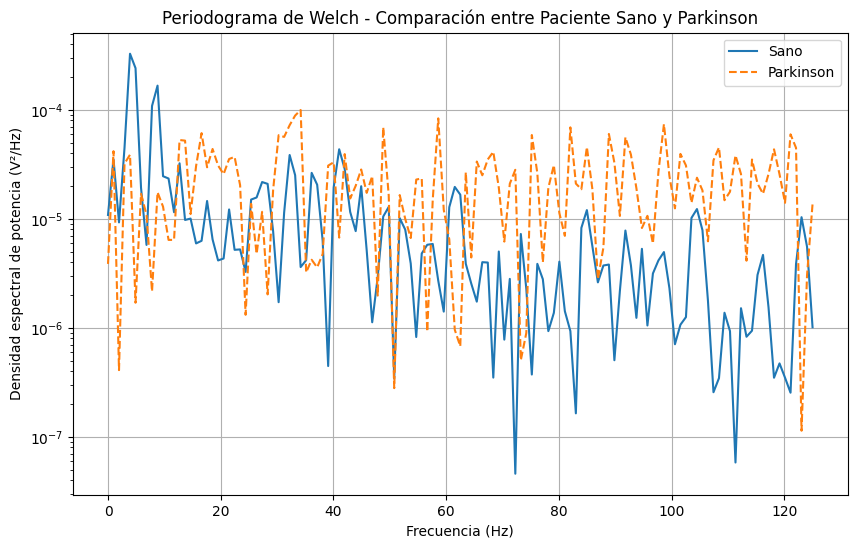

Frecuencias dominantes para el paciente sano: 3.90625
Frecuencias dominantes para el paciente con Parkinson: 34.1796875


In [160]:
# Parámetros de la ventana de Welch
fs = 250  # Frecuencia de muestreo

# Tamaño de la ventana según la longitud de la señal más corta
nperseg_sano = min(256, len(señal_sano))  
nperseg_park = min(256, len(señal_park)) 

# ventana de Hanning 
window_sano = np.hanning(nperseg_sano)
window_park = np.hanning(nperseg_park)
noverlap = int(min(nperseg_sano, nperseg_park) * 0.5)  # Solapamiento del 50%

# Periodograma de Welch para el paciente sano
f_sano, Pxx_sano = welch(señal_sano, fs=fs, window=window_sano, noverlap=noverlap, nperseg=nperseg_sano)

# Periodograma de Welch para el paciente con Parkinson
f_park, Pxx_park = welch(señal_park, fs=fs, window=window_park, noverlap=noverlap, nperseg=nperseg_park)

# Gráfica comparativa de los periodogramas
plt.figure(figsize=(10, 6))
plt.semilogy(f_sano, Pxx_sano, label='Sano')
plt.semilogy(f_park, Pxx_park, label='Parkinson', linestyle='--')
plt.title('Periodograma de Welch - Comparación entre Paciente Sano y Parkinson')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V²/Hz)')
plt.legend()
plt.grid(True)
plt.show()

# Análisis de comparación
print("Frecuencias dominantes para el paciente sano:", f_sano[np.argmax(Pxx_sano)])
print("Frecuencias dominantes para el paciente con Parkinson:", f_park[np.argmax(Pxx_park)])

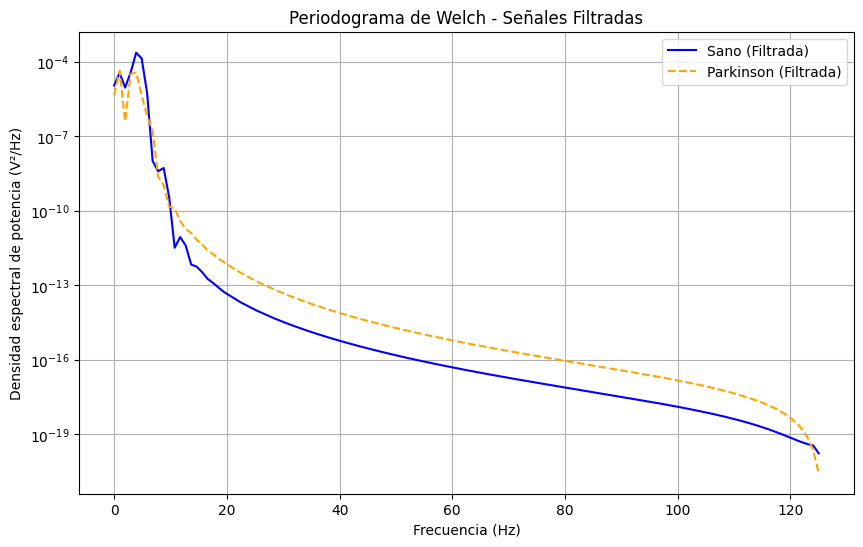

Frecuencias dominantes para el paciente sano (filtrada): 3.90625
Frecuencias dominantes para el paciente con Parkinson (filtrada): 0.9765625


In [121]:
# Función para diseñar un filtro Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Función para aplicar el filtro
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Parámetros del filtro
fs = 250  # Frecuencia de muestreo
cutoff = 5  # Frecuencia de corte en Hz

# Filtrar las señales
señal_sano_filtrada = lowpass_filter(señal_sano, cutoff, fs)
señal_park_filtrada = lowpass_filter(señal_park, cutoff, fs)

# Periodograma de Welch para la señal filtrada
nperseg = 256  # Tamaño de la ventana
noverlap = nperseg // 2  # Solapamiento del 50%

f_sano, Pxx_sano = welch(señal_sano_filtrada, fs=fs, nperseg=nperseg, noverlap=noverlap)
f_park, Pxx_park = welch(señal_park_filtrada, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Gráfica comparativa de los periodogramas
plt.figure(figsize=(10, 6))
plt.semilogy(f_sano, Pxx_sano, label='Sano (Filtrada)', color='blue')
plt.semilogy(f_park, Pxx_park, label='Parkinson (Filtrada)', color='orange', linestyle='--')
plt.title('Periodograma de Welch - Señales Filtradas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V²/Hz)')
plt.legend()
plt.grid(True)
plt.show()

# Análisis de comparación
print("Frecuencias dominantes para el paciente sano (filtrada):", f_sano[np.argmax(Pxx_sano)])
print("Frecuencias dominantes para el paciente con Parkinson (filtrada):", f_park[np.argmax(Pxx_park)])


Los resultados del análisis de marcha revelaron diferencias marcadas entre los dos grupos de paciente Sano y Parkinson. Por un lado, los sujetos sanos mostraron un patrón de marcha más regular y estable, con señales claras que indican que su capacidad motora está intacta. En cambio, los pacientes con Parkinson presentaron una marcha más desorganizada y variable, lo que sugiere que tienen dificultades para mantener un control adecuado sobre sus movimientos. Estas diferencias se pueden observar comparando la senal en Right Stride Interval (sec) que se tradujo en pasos menos predecibles y una mayor inestabilidad. Al comparar las frecuencias de sus pasos, se notó que los sujetos sanos mantenían un ritmo más eficiente, mientras que los pacientes con Parkinson caminaban más lentamente y con una coordinación comprometida. 

La ventana de Hanning reduce los efectos de discontinuidades al final de la sección de datos analizada, esta venta suaviza los extremos de la señal y a su vez al reducirlos ayuda a una estimación más precisa de la densidad espectral de potencia (PSD), Ademas de controlar el ancho de banda de la estimación espectral. Ventanas más anchas pueden capturar más energía de la señal, mientras que las ventanas más estrechas ofrecen una mejor resolución temporal. Se elige esta ventana segun el tamano de su señal mas corta porque estas deben ser de la misma dimensión.

Se uso una ventana con solapamiento de 50% ya que con esta se  puede capturar más datos y suavizar la estimación de la densidad espectral, ademas porque se ve que la señal obtuvo cambios rapidos.


Usando la técnica de Welch, se estudian  la frecuencia, la intensidad de la marcha y cómo varían los tiempos entre los pasos. En estos pacientes, se ha notado que esos intervalos son más impredecibles, lo que puede llevar a episodios de congelación de la marcha, donde sienten que sus pies están pegados al suelo. Este fenómeno, que puede durar desde unos segundos hasta minutos, se vuelve especialmente problemático porque incrementa el riesgo de caídas y lesiones, especialmente en situaciones donde se sienten inseguros, como al girar o enfrentar obstáculos. Luego La función butter_lowpass calcula los coeficientes del filtro en función de la frecuencia de corte, la frecuencia de muestreo y el orden del filtro, mientras que la función lowpass_filter aplica este filtro a los datos utilizando la función filtfilt, que evita el desfase en la señal filtrada. Finalmente las señales filtradas se analizan mediante el periodograma de Welch, que estima la densidad espectral de potencia, y se grafican para comparar las características de frecuencia entre ambos grupos. 

Los momentos de congelación se reflejan en el análisis como picos en el espectro de la marcha. Estos picos indican periodos en que la marcha se vuelve más inestable, lo que puede hacer que los pacientes pierdan el equilibrio o tengan dificultades para moverse. Esta alta variabilidad en el caminar está relacionada con un mayor riesgo de caídas, una de las complicaciones más serias para quienes tienen Parkinson, ya que puede resultar en lesiones que afecten aún más su capacidad para moverse [4].










## **CONCLUSIONES**

1. Es importante asegurar una frecuencia de muestreo adecuada para la correcta reconstrucción de señales, ya que una muestreo insuficiente puede llevar al fenómeno de aliasing, distorsionando la información original.
2. El análisis de la Transformada de Fourier permite obtener una visualizacion clara de las frecuencias que componen tu señal, verificar si la frecuencia de muestreo fue adecuada y analizar la contribución de cada componente de la señal asegurando que la señal no está distorsionada y se ha obtenido correctamente.
3. El uso de la Transformada de Fourier inversa permite analizar y reconstruir señales en los dominios de frecuencia y tiempo, es un metodo ideal para confirmar que no se ha perdido información. 
4. Para entender señales complejas es ideal el análisis de las diferentes bandas de frecuencia , lo  que permite descomponer la señal en sus componentes de la señal original, Las bandas de frecuencia más bajas tienden a reflejar patrones más estables y suaves, mientras que las bandas más altas capturan cambios rápidos y complejos en la señal. 
5. El método de Welch es una mejora que a través del solapamiento y el uso de ventanas, permite obtener estimaciones más precisas de la señal con menor varianza y mejor resolución. Sin embargo se debe equilibrar la precisión con la carga computacional y la correlación ya que puede afectar su analisis.
6. Ventanas más largas proporcionan una mejor resolución espectral, permitiendo distinguir mejor entre diferentes frecuencias teniendo en cuenta la capacidad de identificar cambios rápidos en la señal, mientras que ventanas más cortas ofrecen mejor resolución temporal, pero pueden dar lugar a una mayor varianza en las estimaciones de la densidad espectral de potencia como en el caso del ultimo punto.



## **BIBLIOGRAFÍA**



[1]Universidad del País Vasco. Escuela Universitaria de Ingeniería Industrial. (n.d.). Muestreo y Aliasing [Actividad 2.2]. Procesado de Señales Virtuales. Recuperado el 13 de octubre de 2024, de https://www.ehu.eus/procesadoinsvirtual/T2_5actividad2.2(muestreo%20y%20aliasing).html

[2] De programacionpython, V. T. las E. (2023, diciembre 6). APLICANDO LA ‘TRANSFORMADA DE FOURIER’ EN PYTHON, CON ‘numpy’. El Programador Chapuzas. https://programacionpython80889555.wordpress.com/2023/12/06/aplicando-la-transformada-de-fourier-en-python-con-numpy/

[3]Eduardo, T. (sin fecha). Método de Welch para estimación de la densidad espectral de potencia . Obtenido en octubre. http://physionet.cps.unizar.es/~eduardo/docencia/tds/librohtml/welch1.htm

[4] Arango, C., & Gonzalez, J. (2013). El EEG en el diagnóstico y seguimiento de la enfermedad de Parkinson. Revista Médica de Chile, 141(6), 785-791. https://doi.org/10.4067/S0034-98872013000600010
